In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

pd.options.display.max_rows = 100

In [11]:
# https://github.com/GRooT-Database/GRooT-Data/blob/master/DataFiles/GRooTAggregateSpeciesVersion.zip
# download and unzip the above .zip file for the .csv database
groot = pd.read_csv(r"./GRooTFullVersion.csv", encoding="latin", low_memory=False)
groot.head()

,GRooTID,source,versionSource,originalID,referencesAbbreviated,references,referencesDataset,referencesAdditional,family,genus,...,belowgroundEntitiesOrder,belowgroundEntitiesOrderMin,belowgroundEntitiesOrderMax,belowgroundEntitiesFunctional,belowgroundEntitiesDiameterMin,belowgroundEntitiesDiameterMax,traitName,traitValue,errorRiskEntries,errorRisk
0,1,FRED,2.0,33116.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Betula,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.85,NaN,NaN
1,2,FRED,2.0,33115.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Picea,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.90,NaN,NaN
2,3,FRED,2.0,33113.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Pinus,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,1.00,NaN,NaN
3,4,FRED,2.0,33112.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Pinus,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.98,NaN,NaN
4,5,FRED,2.0,33114.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Pinus,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.56,NaN,NaN


In [3]:
# it's not that big though!!!!!
groot.shape

(114222, 73)

In [3]:
groot.columns

Index(['GRooTID', 'source', 'versionSource', 'originalID',
       'referencesAbbreviated', 'references', 'referencesDataset',
       'referencesAdditional', 'family', 'genus', 'species', 'infraspecific',
       'familyTNRS', 'genusTNRS', 'speciesTNRS', 'infraspecificTNRS',
       'taxonomicStatus', 'taxonomicInformation', 'group', 'order',
       'growthForm', 'photosyntheticPathway', 'woodiness',
       'mycorrhizalAssociationType', 'mycorrhizalAssociationTypeFungalRoot',
       'nitrogenFixationNodDB', 'abilityToGrownClonallyCloPla',
       'budBearingOrganCloPla', 'vitality', 'measurementProvenance',
       'measurementTreatments', 'measurementMethod', 'year', 'yearBegin',
       'yearEnd', 'ageStand', 'agePlant', 'locationID', 'location',
       'decimalLatitude', 'decimalLongitud', 'climaticInformation',
       'biomesKoeppen', 'biomesKoeppenGroup', 'temperatureColdestMonth',
       'temperatureWarmestMonth', 'meanAnnualTemperature',
       'meanAnnualPrecipitation', 'elevation', 

In [54]:
# this is a ROOT trait database!!!!
groot.loc[:, "traitName"].unique()

array(['Rooting_depth', 'Root_production', 'Root_turnover_rate',
       'Root_C_concentration', 'Root_C_N_ratio',
       'Root_lignin_concentration', 'Root_N_concentration',
       'Root_total_structural_carbohydrate_concentration',
       'Root_Ca_concentration', 'Root_K_concentration',
       'Root_Mg_concentration', 'Root_P_concentration',
       'Root_length_density_volume', 'Specific_root_respiration',
       'Root_mass_density', 'Root_Mn_concentration',
       'Root_mycorrhizal colonization', 'Root_mass_fraction',
       'Root_litter_mass_loss_rate', 'Coarse_root_fine_root_mass_ratio',
       'Fine_root_mass_leaf_mass_ratio', 'Mean_Root_diameter',
       'Root_tissue_density', 'Specific_root_area',
       'Specific_root_length', 'Root_stele_diameter',
       'Root_stele_fraction', 'Root_branching_density',
       'Root_lifespan_mean', 'Root_lifespan_median',
       'Root_vessel_diameter', 'Root_branching_ratio',
       'Root_dry_matter_content', 'Root_cortex_thickness',
       'N

In [55]:
np.unique(groot.loc[:, "traitName"], return_counts=True)

(array(['Coarse_root_fine_root_mass_ratio',
        'Fine_root_mass_leaf_mass_ratio', 'Lateral_spread',
        'Mean_Root_diameter', 'Net_nitrogen_uptake_rate', 'Root_C_N_ratio',
        'Root_C_concentration', 'Root_Ca_concentration',
        'Root_K_concentration', 'Root_Mg_concentration',
        'Root_Mn_concentration', 'Root_N_P_ratio', 'Root_N_concentration',
        'Root_P_concentration', 'Root_branching_density',
        'Root_branching_ratio', 'Root_cortex_thickness',
        'Root_dry_matter_content', 'Root_length_density_volume',
        'Root_lifespan_mean', 'Root_lifespan_median',
        'Root_lignin_concentration', 'Root_litter_mass_loss_rate',
        'Root_mass_density', 'Root_mass_fraction',
        'Root_mycorrhizal colonization', 'Root_production',
        'Root_stele_diameter', 'Root_stele_fraction',
        'Root_tissue_density',
        'Root_total_structural_carbohydrate_concentration',
        'Root_turnover_rate', 'Root_vessel_diameter',
        'Root_xylem_

TypeError: Axis.set_ticks() missing 1 required positional argument: 'ticks'

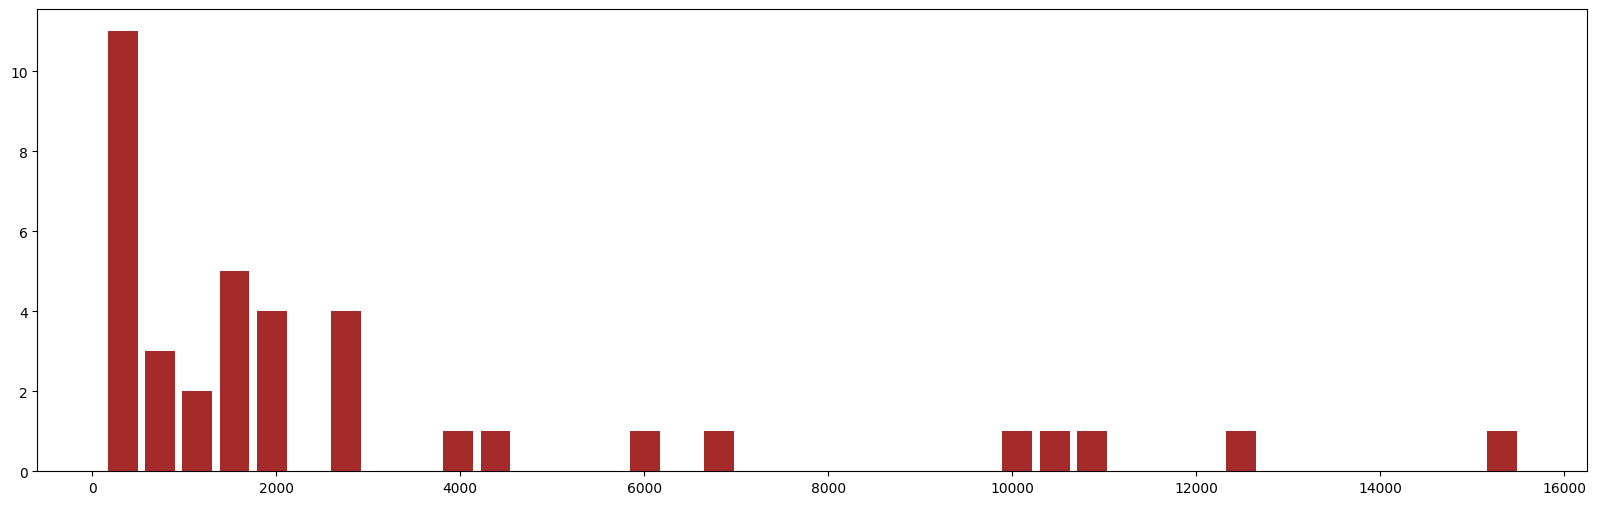

In [52]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 6)
t, c = np.unique(groot.traitName, return_counts=True)
axes.hist(c, bins=c.size, color = "brown", rwidth=0.8)
axes.set_xticks(labels=t, ticks=np.)
plt.show()

In [56]:
groot.loc[:, "family"].isna().mean()  # fucking hell!!!

np.float64(0.7910822783701914)

In [57]:
rdepth = groot.loc[groot.loc[:, "traitName"] == "Rooting_depth", ["genus", "traitValue"]]

In [58]:
rdepth.shape

(2669, 2)

In [59]:
genus = np.unique(groot.genus)

In [60]:
genus.size  # that's a lot!!!

1959

In [16]:
genus, freqs = np.unique(groot.genus, return_counts=True)
pd.Series(genus, index=freqs).sort_index(ascending=False)[:20] # Pinus has the most records

6675           Pinus
4075         Quercus
4069          Betula
3775            Acer
1966             Poa
1957         Festuca
1636           Carex
1589        Fraxinus
1485           Picea
1440        Plantago
1436          Galium
1398       Trifolium
1312    Anthoxanthum
1287           Larix
1283      Ranunculus
1259         Populus
1238        Dactylis
1148        Veronica
1118           Rumex
1113           Fagus
dtype: object

In [62]:
pinus = groot.loc[np.bitwise_and(groot.genus == "Pinus", groot.traitName == "Rooting_depth"), "traitValue"]

In [63]:
pinus

2        1.0000
3        0.9800
4        0.5600
290      2.2000
291      2.0000
          ...  
60095    0.8128
60096    0.0762
60097    0.9779
61501    1.2500
61510    1.0000
Name: traitValue, Length: 140, dtype: float64

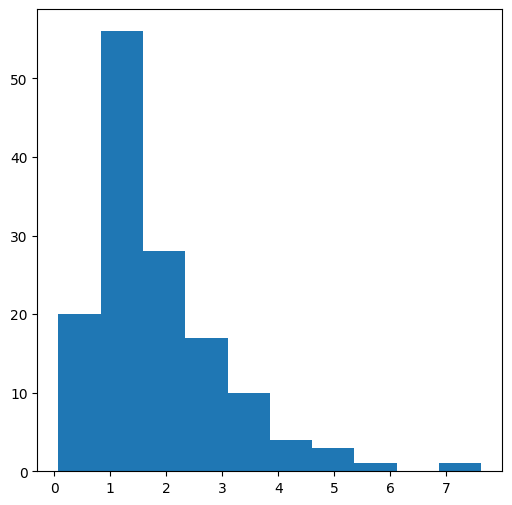

In [65]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.hist(pinus)
plt.show()

In [21]:
# dask seems cumbersome, sticking to pandas :(

In [5]:
groot.columns, groot.columns.size

(Index(['GRooTID', 'source', 'versionSource', 'originalID',
        'referencesAbbreviated', 'references', 'referencesDataset',
        'referencesAdditional', 'family', 'genus', 'species', 'infraspecific',
        'familyTNRS', 'genusTNRS', 'speciesTNRS', 'infraspecificTNRS',
        'taxonomicStatus', 'taxonomicInformation', 'group', 'order',
        'growthForm', 'photosyntheticPathway', 'woodiness',
        'mycorrhizalAssociationType', 'mycorrhizalAssociationTypeFungalRoot',
        'nitrogenFixationNodDB', 'abilityToGrownClonallyCloPla',
        'budBearingOrganCloPla', 'vitality', 'measurementProvenance',
        'measurementTreatments', 'measurementMethod', 'year', 'yearBegin',
        'yearEnd', 'ageStand', 'agePlant', 'locationID', 'location',
        'decimalLatitude', 'decimalLongitud', 'climaticInformation',
        'biomesKoeppen', 'biomesKoeppenGroup', 'temperatureColdestMonth',
        'temperatureWarmestMonth', 'meanAnnualTemperature',
        'meanAnnualPrecipitation'

In [8]:
groot.agePlant.isna().mean()  # WTF????

np.float64(0.9128626709390485)

In [12]:
groot.isna().mean(axis=0)

GRooTID                                   0.000000
source                                    0.000000
versionSource                             0.472238
originalID                                0.301439
referencesAbbreviated                     0.000000
references                                0.000000
referencesDataset                         0.656143
referencesAdditional                      0.979312
family                                    0.791082
genus                                     0.000000
species                                   0.014463
infraspecific                             0.991324
familyTNRS                                0.000079
genusTNRS                                 0.000000
speciesTNRS                               0.015645
infraspecificTNRS                         0.991368
taxonomicStatus                           0.000000
taxonomicInformation                      0.000000
group                                     0.089694
order                          

In [34]:
# screw this man
groot.agePlant.isna().mean()

np.float64(0.9128626709390485)

In [42]:
np.logical_not(groot.agePlant.isna()).sum()

np.int64(9953)

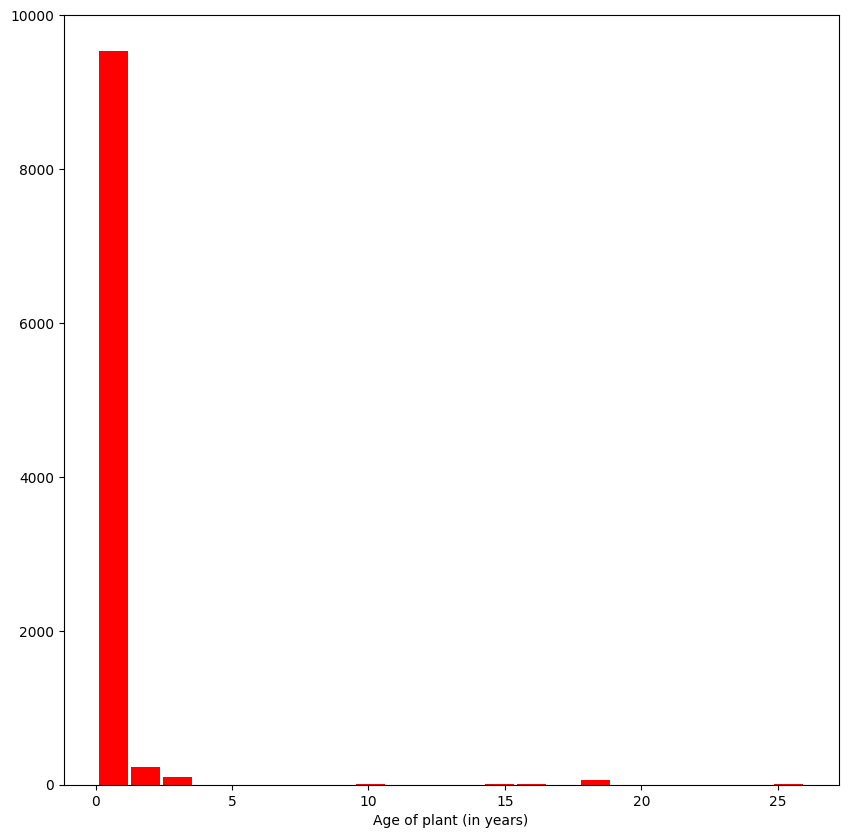

In [29]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 10)
axes.hist(groot.agePlant, bins=groot.agePlant.unique().size, color="red", rwidth=0.9)
axes.set_xlabel("Age of plant (in years)")
plt.show()

In [3]:
pd.DataFrame(np.unique_counts(groot.loc[:, "mycorrhizalAssociationTypeFungalRoot"].dropna())).T

,0,1
0,AM,71043
1,EcM,22727
2,EcM-AM,2835
3,ErM,1177
4,NM,1497
5,NM-AM,12231
6,"NM-AM, rarely EcM",14
7,OM,315
8,species-specific: AM or rarely EcM-AM or AM,15
9,uncertain,141
